<a href="https://colab.research.google.com/github/wereketenge/Projects/blob/main/Happiness_Report_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [ ]:
# Paso 1: Instalar gdown para descarga directa desde Google Drive
!pip install -q --upgrade gdown

# Paso 2: Simular estructura de proyecto (como si fuera carpeta "visualizacion_de_datos")
import os
base_path = "/content/visualizacion_de_datos/"
os.makedirs(base_path, exist_ok=True)

# Paso 3: Descargar archivos desde los enlaces proporcionados
import gdown

# URL y nombres de archivos
url_happiness = "https://drive.google.com/uc?id=18qTrlrlM2x2VbiSzzAtxgQCBWB234Lod"
url_metadata = "https://drive.google.com/uc?id=1VW_huRzQWTQ3d0Af6jnduEj5r_WV-HT1"

output_happiness = os.path.join(base_path, "Happiness_report.csv")
output_metadata = os.path.join(base_path, "Metadata.csv")

# Descargas
gdown.download(url_happiness, output_happiness, quiet=False)
gdown.download(url_metadata, output_metadata, quiet=False)

# Paso 4: Cargar archivos CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

happiness = pd.read_csv(output_happiness)
metadata = pd.read_csv(output_metadata)


Downloading...
From: https://drive.google.com/uc?id=18qTrlrlM2x2VbiSzzAtxgQCBWB234Lod
To: /content/visualizacion_de_datos/Happiness_report.csv
100%|██████████| 8.82k/8.82k [00:00<00:00, 11.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VW_huRzQWTQ3d0Af6jnduEj5r_WV-HT1
To: /content/visualizacion_de_datos/Metadata.csv
100%|██████████| 28.0k/28.0k [00:00<00:00, 25.2MB/s]


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [ ]:
mexico = happiness[happiness['Country or region'] == 'Mexico'].copy()
mexico.set_index('Country or region', inplace=True)

# Mostrar el resultado
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

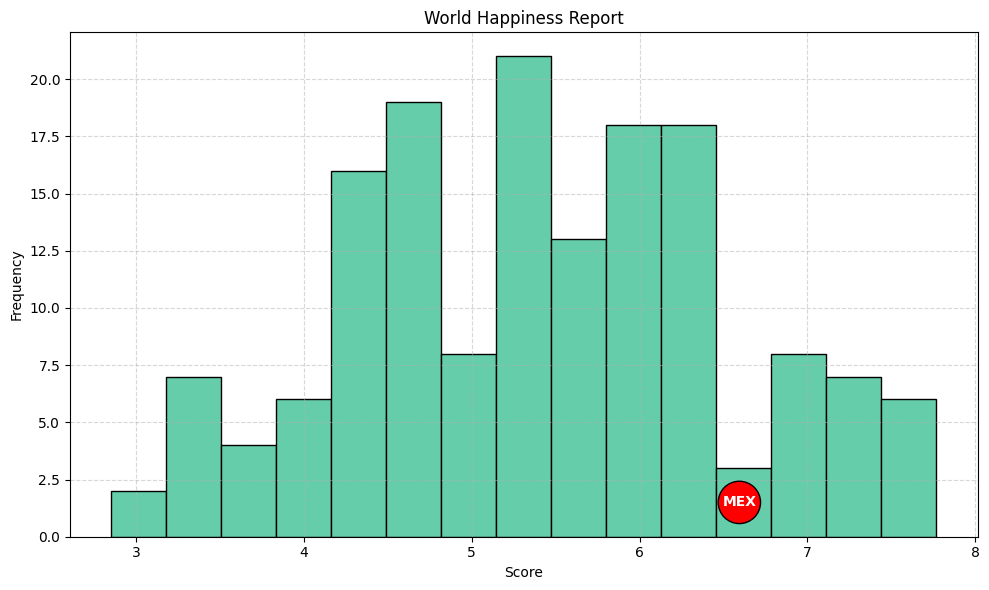

In [ ]:
import matplotlib.pyplot as plt

# Valor del puntaje de México
score_mexico = mexico['Score'].values[0]

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=15, color='mediumaquamarine', edgecolor='black')

# Coordenadas para la etiqueta
x_pos = score_mexico
y_pos = 1.5

# Texto con fondo en forma de círculo rojo
plt.text(x_pos, y_pos, 'MEX',
         color='white',
         ha='center',
         va='center',
         fontsize=10,
         weight='bold',
         bbox=dict(boxstyle='circle,pad=0.3', facecolor='red', edgecolor='black'))

# Personalización del gráfico
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

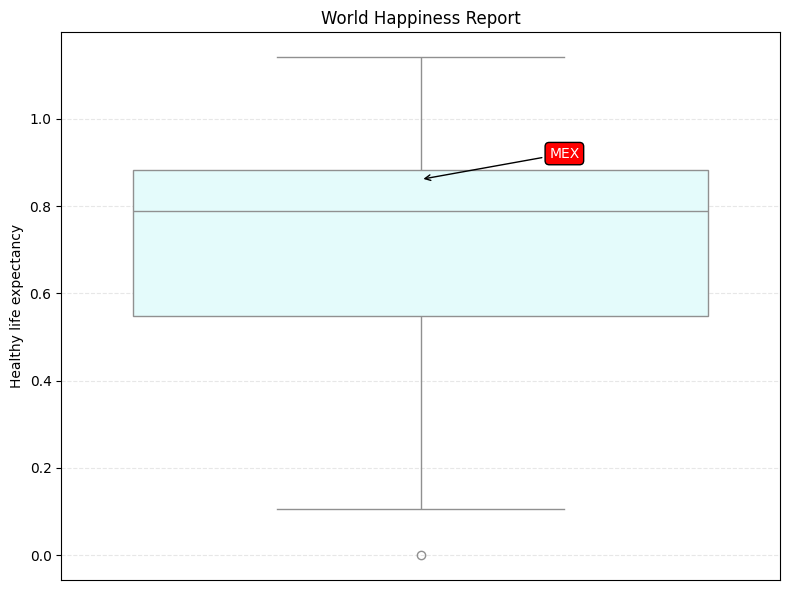

In [ ]:
import matplotlib.pyplot as plt

# Obtener valor de esperanza de vida para México
vida_mexico = mexico['Healthy life expectancy'].values[0]

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=happiness['Healthy life expectancy'], color='lightcyan')

# Agregar anotación (flecha) para México
plt.annotate('MEX',
             xy=(0, vida_mexico),         # punto al que apunta
             xytext=(0.2, vida_mexico + 0.05),  # posición del texto
             textcoords='data',
             ha='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="red", ec="black"),
             color='white',
             arrowprops=dict(arrowstyle="->", color='black'))

# Personalización
plt.title('World Happiness Report')
plt.ylabel('Healthy life expectancy')
plt.xticks([])  # quitar eje X ya que no hay categorías
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

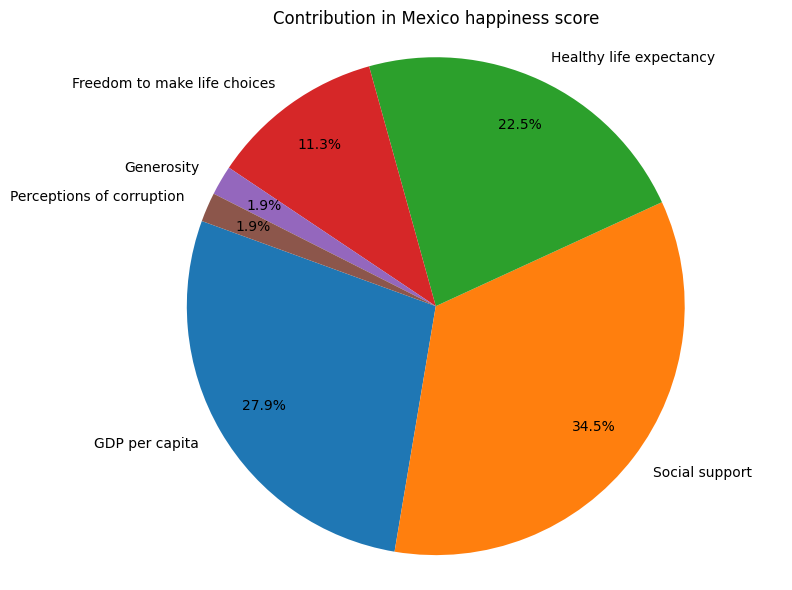

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar los factores de interés
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Reestructurar el dataframe México
mexico_factores = mexico[factores].T
mexico_factores.columns = ['Valor']
mexico_factores['Factor'] = mexico_factores.index

# Crear gráfico circular con mejor rotación
plt.figure(figsize=(8, 6))
plt.pie(mexico_factores['Valor'],
        labels=mexico_factores['Factor'],
        autopct='%1.1f%%',
        startangle=160,  # Gira el gráfico para evitar amontonamiento
        pctdistance=0.8, # Acerca los porcentajes al centro
        labeldistance=1.1)  # Aleja las etiquetas del centro

plt.title('Contribution in Mexico happiness score')
plt.axis('equal')
plt.tight_layout()
plt.show()


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

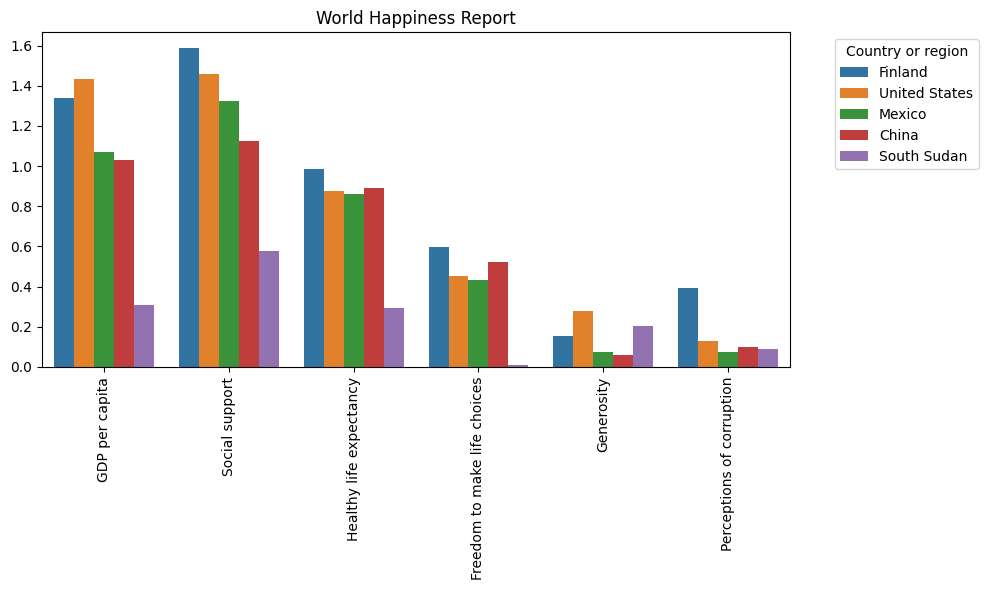

In [ ]:
# Países seleccionados (como en tu imagen)
paises = ['Finland', 'United States', 'Mexico', 'China', 'South Sudan']

# Factores que se evaluarán
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Filtrar el DataFrame
df_seleccion = happiness[happiness['Country or region'].isin(paises)][['Country or region'] + factores]

# Reestructurar para gráfico de barras
df_melt = df_seleccion.melt(id_vars='Country or region',
                            var_name='Factor',
                            value_name='Valor')

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='Factor', y='Valor', hue='Country or region')

# Personalización
plt.title('World Happiness Report')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend(title='Country or region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

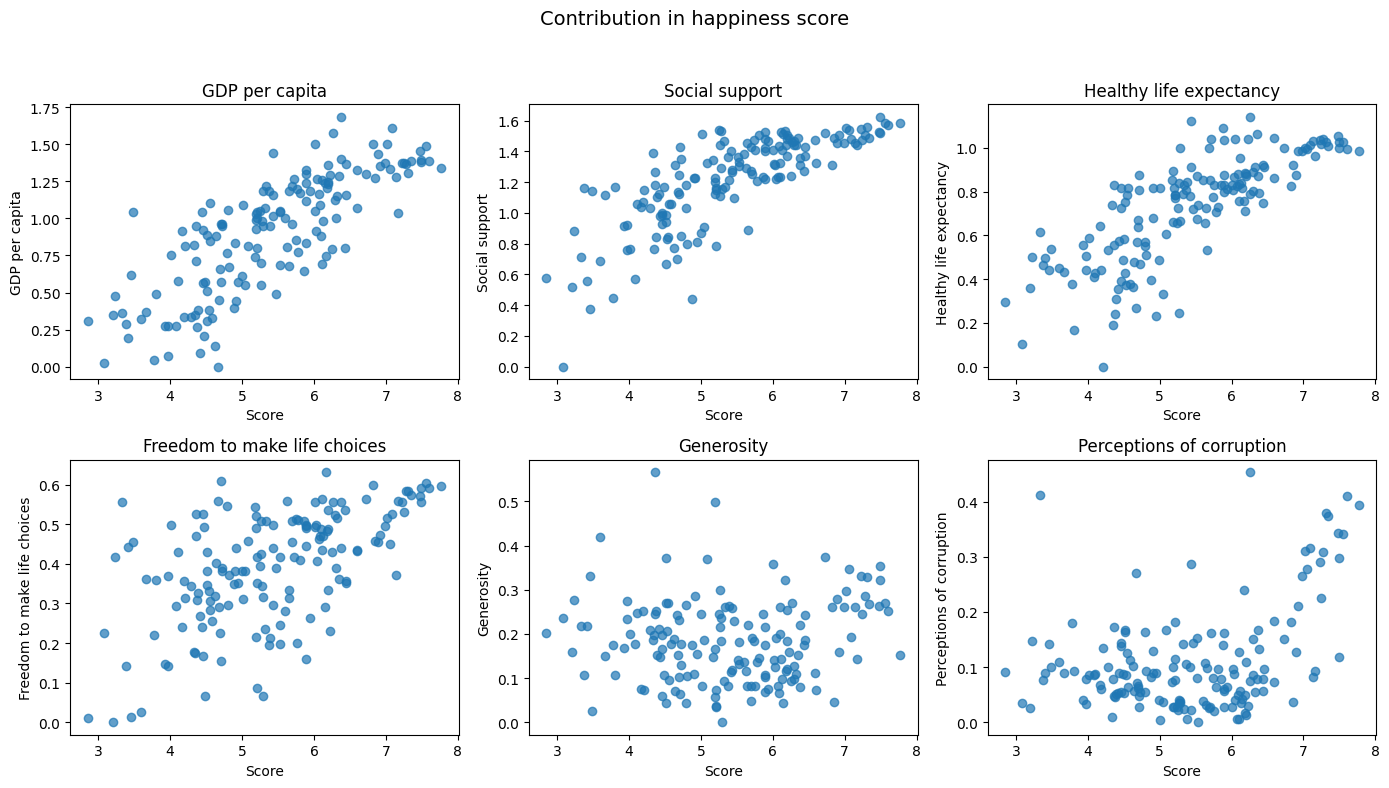

In [ ]:
# Lista de factores a comparar contra Score
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Crear figura con subgráficas (2 filas x 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Contribution in happiness score', fontsize=14)

# Dibujar scatter plot en cada subgráfico
for i, factor in enumerate(factores):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.scatter(happiness['Score'], happiness[factor], alpha=0.7)
    ax.set_title(factor)
    ax.set_xlabel('Score')
    ax.set_ylabel(factor)

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título
plt.show()


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

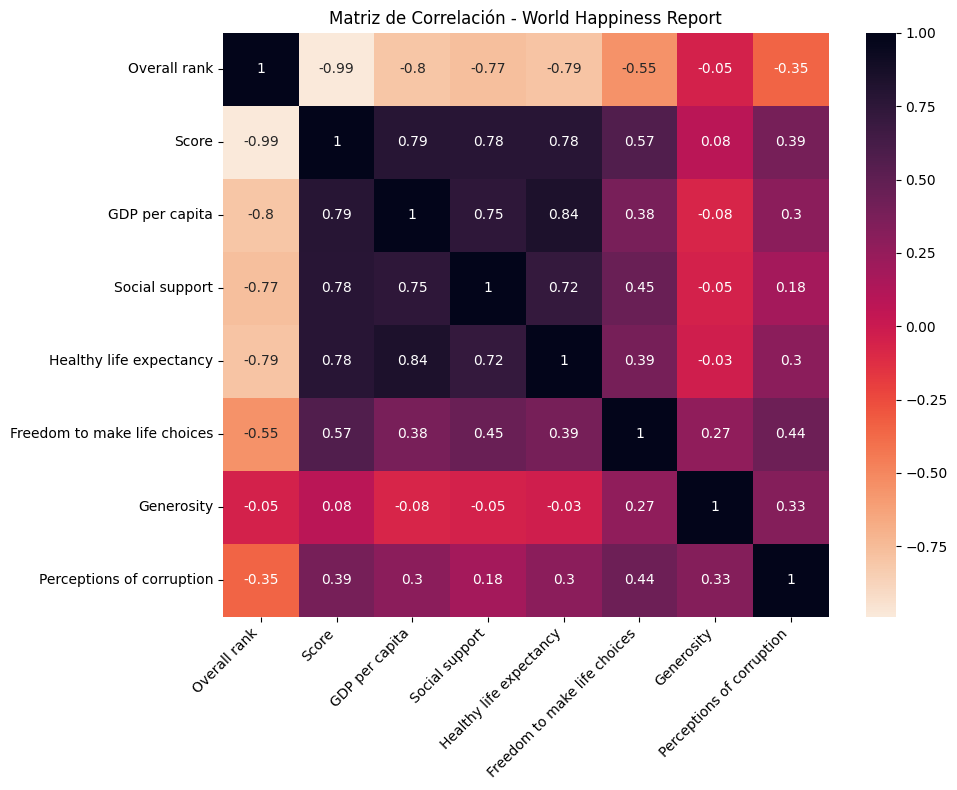

In [ ]:
# Seleccionar solo columnas numéricas
correlaciones = happiness.corr(numeric_only=True).round(2)

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='rocket_r', center=0)

# Personalización
plt.title('Matriz de Correlación - World Happiness Report')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


10.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

/tmp/ipython-input-23-172583138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_region, x='Region', y='Score', palette='pastel')


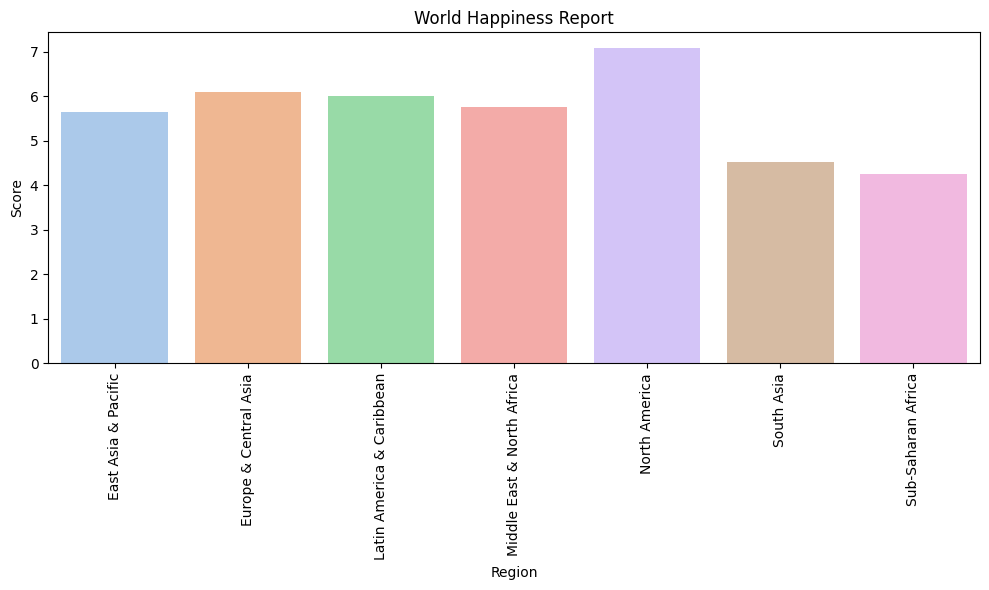

In [ ]:
# Renombrar la columna "TableName" para que coincida con "Country or region"
metadata_renamed = metadata.rename(columns={'TableName': 'Country or region'})

# Hacer merge por columna común ya alineada
df_completo = pd.merge(happiness, metadata_renamed, on='Country or region', how='left')

# Agrupar por región y calcular promedio de Score
promedio_region = df_completo.groupby('Region', as_index=False)['Score'].mean()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=promedio_region, x='Region', y='Score', palette='pastel')

# Personalización
plt.title('World Happiness Report')
plt.xlabel('Region')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

